In [10]:
# Data Pull & Any functions I make up
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

image_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train=x_train.astype(float)
x_test=x_test.astype(float)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
X_train = x_train/255
X_test = x_test/255
sets=[X_train, y_train, X_test, y_test]
for i in sets:
  print('{} shape: {}'.format(namestr(i,globals()), i.shape))

['X_train', 'i'] shape: (50000, 32, 32, 3)
['y_train', 'i'] shape: (50000, 1)
['X_test', 'i'] shape: (10000, 32, 32, 3)
['y_test', 'i'] shape: (10000, 1)


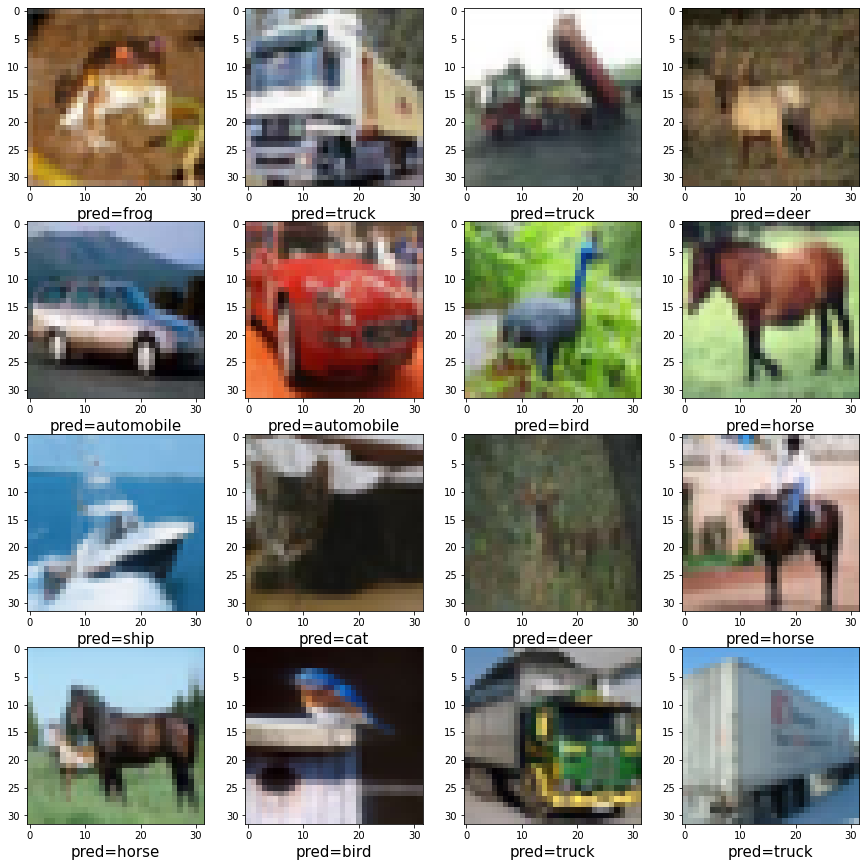

In [ ]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[i].astype(int))
    plt.xlabel('pred={}'.format(image_dict[y_train[i].item()]), fontsize=15)
plt.show()

# Experiment 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


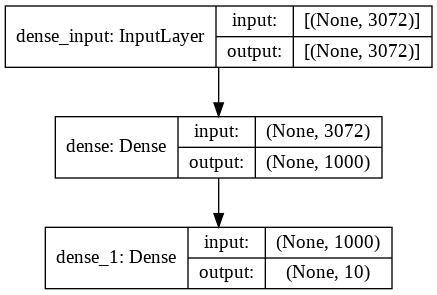

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model
keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(1000, activation='relu', input_shape=[3072]))
model1.add(Dense(10, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
plot_model(model1, show_shapes=True, show_layer_names=True)

In [7]:
DNN_X_train=X_train.reshape(X_train.shape[0], 3072)
DNN_X_test=X_test.reshape(X_test.shape[0], 3072)
print(DNN_X_train.shape)

(50000, 3072)


In [8]:
history1=model1.fit(DNN_X_train, y_train, batch_size=32, validation_data=(DNN_X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 15s 3ms/step - loss: 2.2376 - accuracy: 0.2813 - val_loss: 1.6996 - val_accuracy: 0.3933
Epoch 2/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7126 - accuracy: 0.3860 - val_loss: 1.6287 - val_accuracy: 0.4169
Epoch 3/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6284 - accuracy: 0.4206 - val_loss: 1.6079 - val_accuracy: 0.4260
Epoch 4/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5811 - accuracy: 0.4409 - val_loss: 1.5669 - val_accuracy: 0.4366
Epoch 5/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5537 - accuracy: 0.4489 - val_loss: 1.5678 - val_accuracy: 0.4440
Epoch 6/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5207 - accuracy: 0.4576 - val_loss: 1.5335 - val_accuracy: 0.4555
Epoch 7/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5145 - accuracy: 0.4637 - val_loss: 1.5263 - val_a

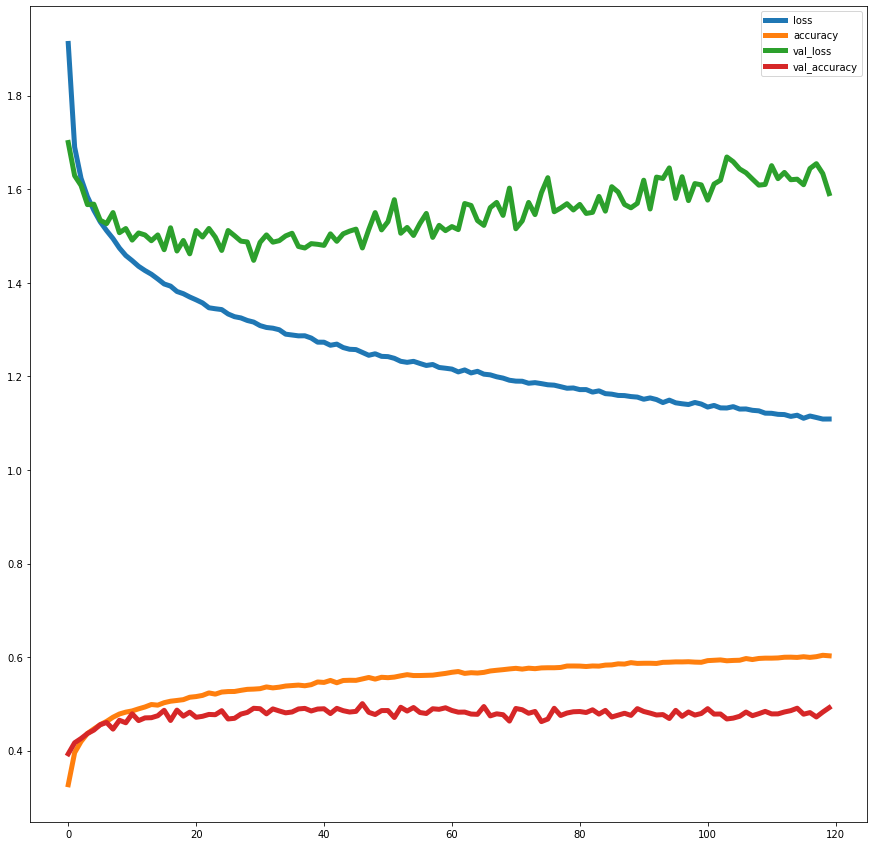

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(15,15))
history1_df=pd.DataFrame(history1.history)
plt.plot(history1_df, linewidth=5)
plt.legend(history1_df.columns.to_list())
plt.show()

#### There is evidence of overtraining for this DNN even with the little accuracy that it is able to achieve. This is to be expected as it cannot distinguish features from the training vectors and a flat DNN has been proven to be inneffective.

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


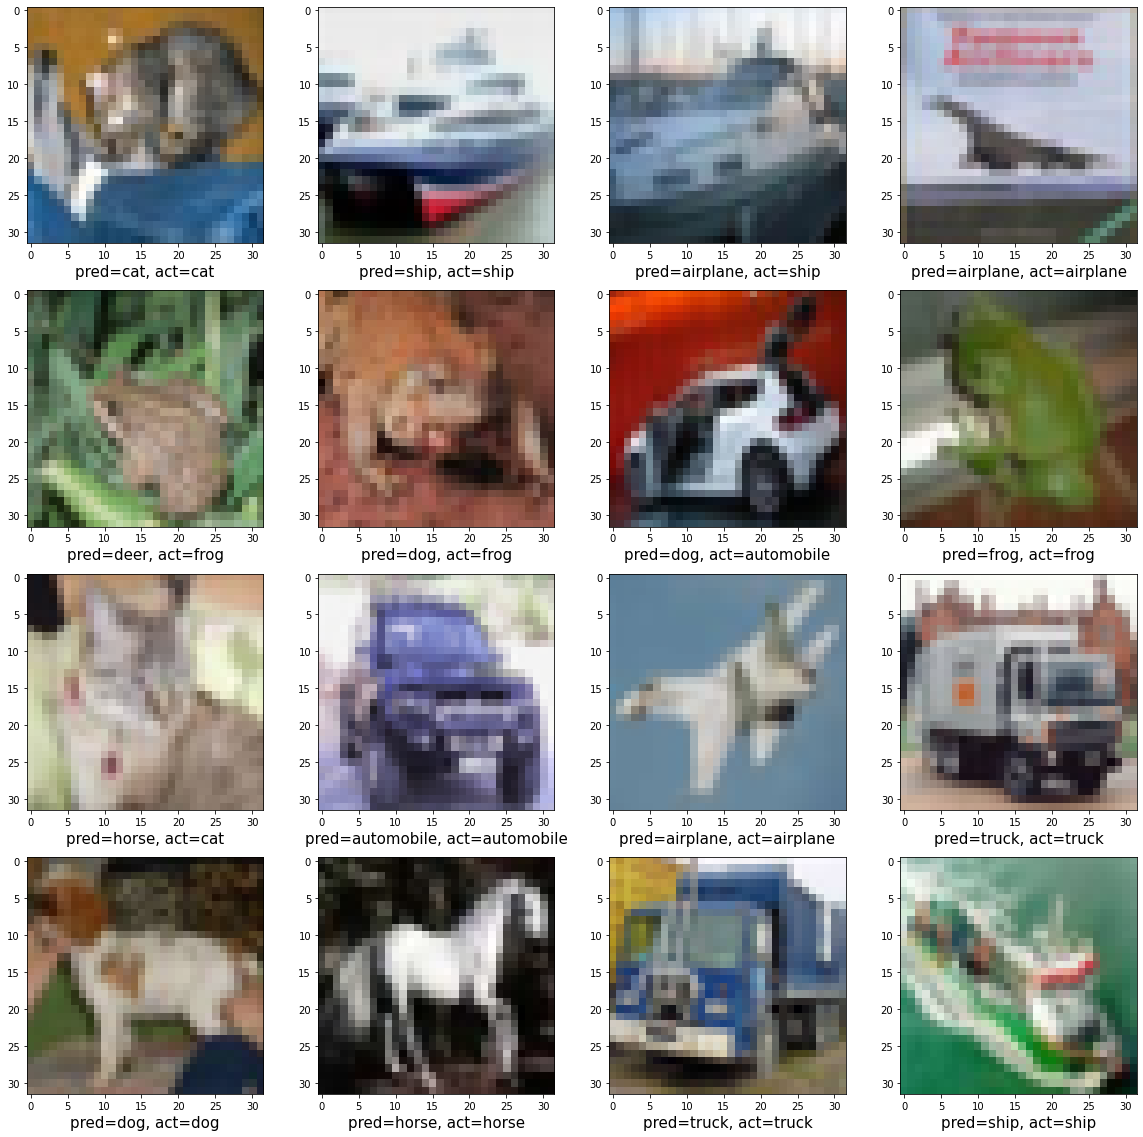

In [10]:
y_pred = model1.predict_classes(DNN_X_test)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

In [11]:
layer_outputs= [layer.output for layer in model1.layers]
activation_model=models.Model(inputs=model1.input, outputs=layer_outputs)
print(f"There are {len(layer_outputs)} layers")

There are 2 layers


# Experiment 2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 3,174,110
Trainable params: 3,174,110
Non-trainable params: 0
_________________________________________________________________


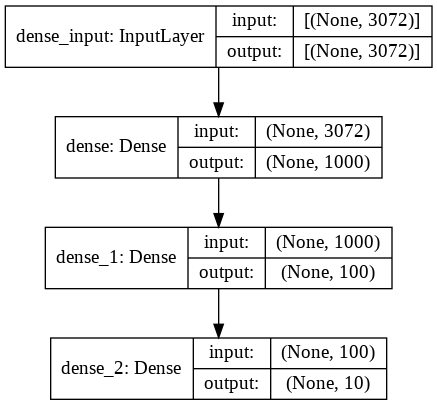

In [ ]:
keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(1000, activation='relu', input_shape=[3072]))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
history2=model2.fit(DNN_X_train, y_train, batch_size=32, validation_data=(DNN_X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0804 - accuracy: 0.2661 - val_loss: 1.7119 - val_accuracy: 0.3783
Epoch 2/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7087 - accuracy: 0.3848 - val_loss: 1.6242 - val_accuracy: 0.4214
Epoch 3/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6087 - accuracy: 0.4259 - val_loss: 1.5733 - val_accuracy: 0.4374
Epoch 4/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5510 - accuracy: 0.4443 - val_loss: 1.5225 - val_accuracy: 0.4597
Epoch 5/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5065 - accuracy: 0.4658 - val_loss: 1.5444 - val_accuracy: 0.4424
Epoch 6/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4797 - accuracy: 0.4748 - val_loss: 1.4784 - val_accuracy: 0.4690
Epoch 7/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4524 - accuracy: 0.4805 - val_loss: 1.4693 - val_ac

#### This is similar to the first experiment but with a stronger evidence of overtraining due to the aformentioned factors.

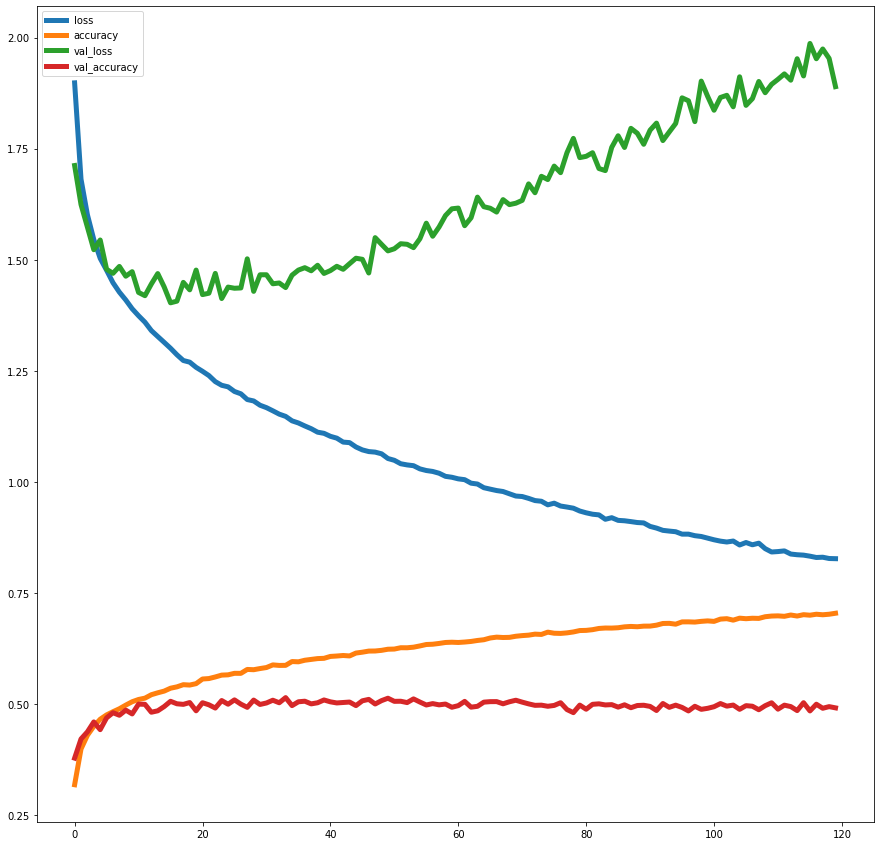

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(15,15))
history2_df=pd.DataFrame(history2.history)
plt.plot(history2_df, linewidth=5)
plt.legend(history2_df.columns.to_list())
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


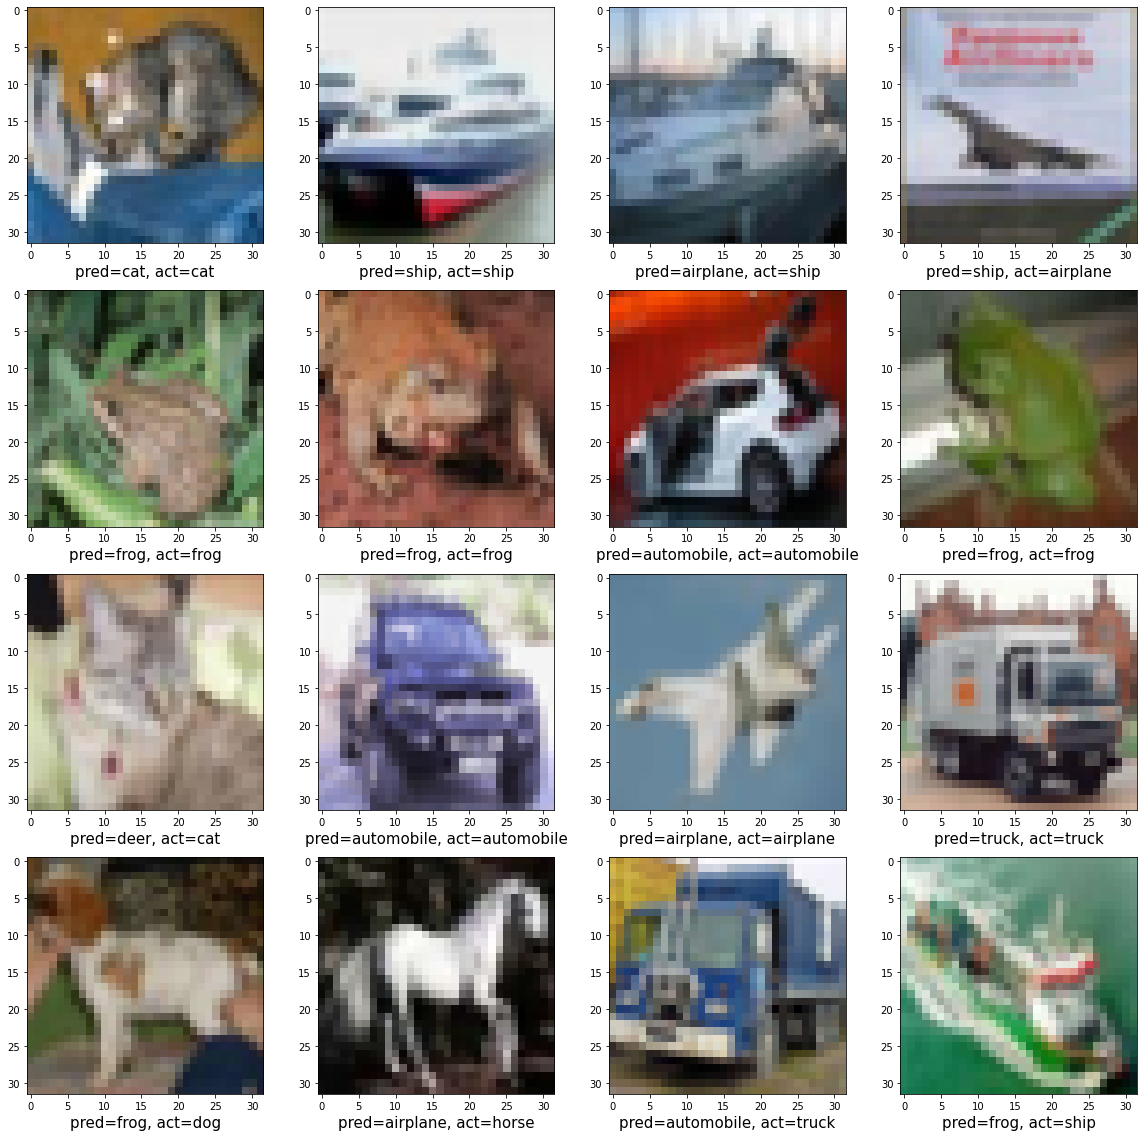

In [ ]:
y_pred2 = model2.predict_classes(DNN_X_test)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred2[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

# Experiment 3

In [ ]:
keras.backend.clear_session()
model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model3.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
# model3.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model3.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model3.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
# model3.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128,activation='relu'))
# model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(10))
model3.add(keras.layers.Activation('softmax'))
model3.summary()
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
history3=model3.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 22s 5ms/step - loss: 1.6902 - accuracy: 0.3809 - val_loss: 1.4246 - val_accuracy: 0.4854
Epoch 2/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3532 - accuracy: 0.5155 - val_loss: 1.3061 - val_accuracy: 0.5290
Epoch 3/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2245 - accuracy: 0.5670 - val_loss: 1.1787 - val_accuracy: 0.5738
Epoch 4/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1172 - accuracy: 0.6034 - val_loss: 1.1303 - val_accuracy: 0.5941
Epoch 5/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0397 - accuracy: 0.6326 - val_loss: 1.1276 - val_accuracy: 0.5989
Epoch 6/120
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9648 - accuracy: 0.6597 - val_loss: 1.1017 - val_accuracy: 0.6070
Epoch 7/120
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9013 - accuracy: 0.6826 - val_loss: 1.1055 - val_a

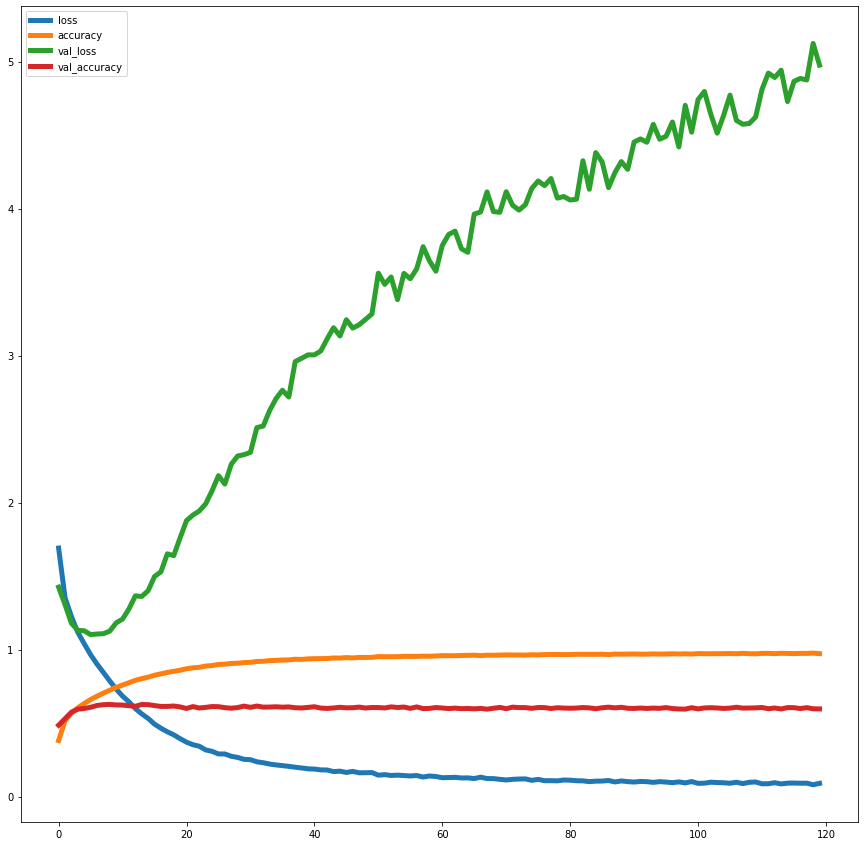

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(15,15))
history3_df=pd.DataFrame(history3.history)
plt.plot(history3_df, linewidth=5)
plt.legend(history3_df.columns.to_list())
plt.show()

In [ ]:
#### This model is severely overtrained like the other CNNs. I am working on reducing that to an acceptable level.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


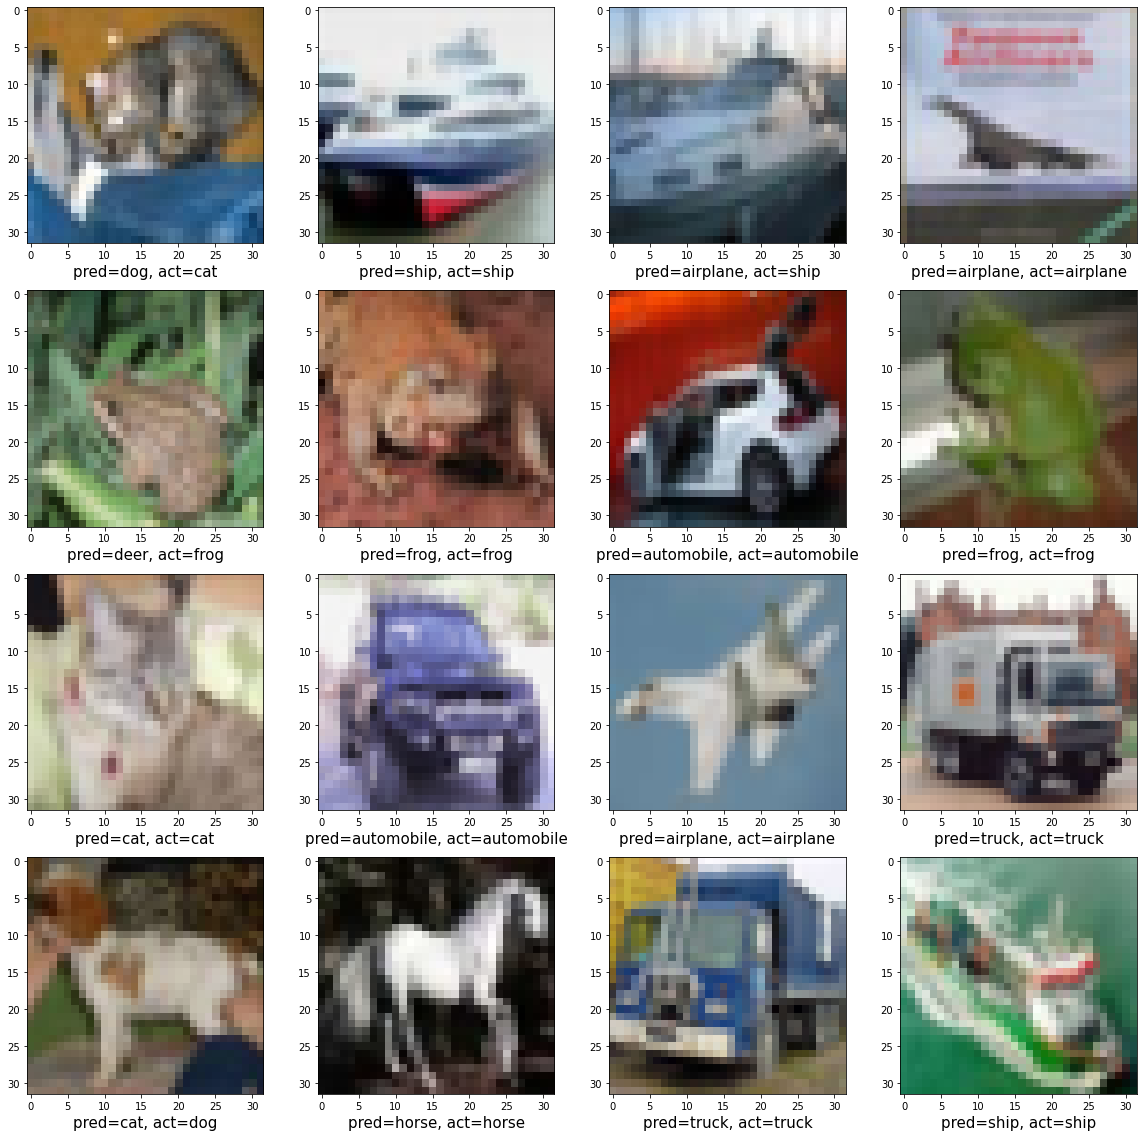

In [ ]:
y_pred3 = model3.predict_classes(X_test)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred3[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

In [2]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as plticker
# try:
#     from PIL import Image
# except ImportError:
#     import Image

# # Open image file
# image = image.resize(size=(320, 320))
# my_dpi=320

# # Set up figure
# fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
# ax=fig.add_subplot(111)

# # Remove whitespace from around the image
# fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# # Set the gridding interval: here we use the major tick interval
# myInterval=40
# loc = plticker.MultipleLocator(base=myInterval)
# ax.xaxis.set_major_locator(loc)
# ax.yaxis.set_major_locator(loc)

# # Add the grid
# ax.grid(which='major', axis='both', linestyle='-')

# # Add the image
# ax.imshow(image)

# # Find number of gridsquares in x and y direction
# nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
# ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# # Add some labels to the gridsquares
# for j in range(ny):
#     y=myInterval/2+j*myInterval
#     for i in range(nx):
#         x=myInterval/2.+float(i)*myInterval
#         ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center', fontsize=4)


In [3]:
keras.backend.clear_session()
model4=keras.models.Sequential()
model4.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model4.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
# model4.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model4.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
# model4.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model4.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(256,activation='relu'))
# model4.add(keras.layers.Dropout(0.5))
model4.add(keras.layers.Dense(256,activation='relu'))
# model4.add(keras.layers.Dropout(0.5))
model4.add(keras.layers.Dense(10))
model4.add(keras.layers.Activation('softmax'))
model4.summary()
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 256)         590080    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [4]:
history4=model4.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 23s 5ms/step - loss: 1.9414 - accuracy: 0.2186 - val_loss: 1.7083 - val_accuracy: 0.3438
Epoch 2/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6132 - accuracy: 0.3883 - val_loss: 1.4531 - val_accuracy: 0.4602
Epoch 3/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4173 - accuracy: 0.4822 - val_loss: 1.3699 - val_accuracy: 0.5027
Epoch 4/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3034 - accuracy: 0.5339 - val_loss: 1.2942 - val_accuracy: 0.5274
Epoch 5/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2145 - accuracy: 0.5699 - val_loss: 1.2060 - val_accuracy: 0.5684
Epoch 6/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1453 - accuracy: 0.5974 - val_loss: 1.2602 - val_accuracy: 0.5640
Epoch 7/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0845 - accuracy: 0.6207 - val_loss: 1.2401 - val_a

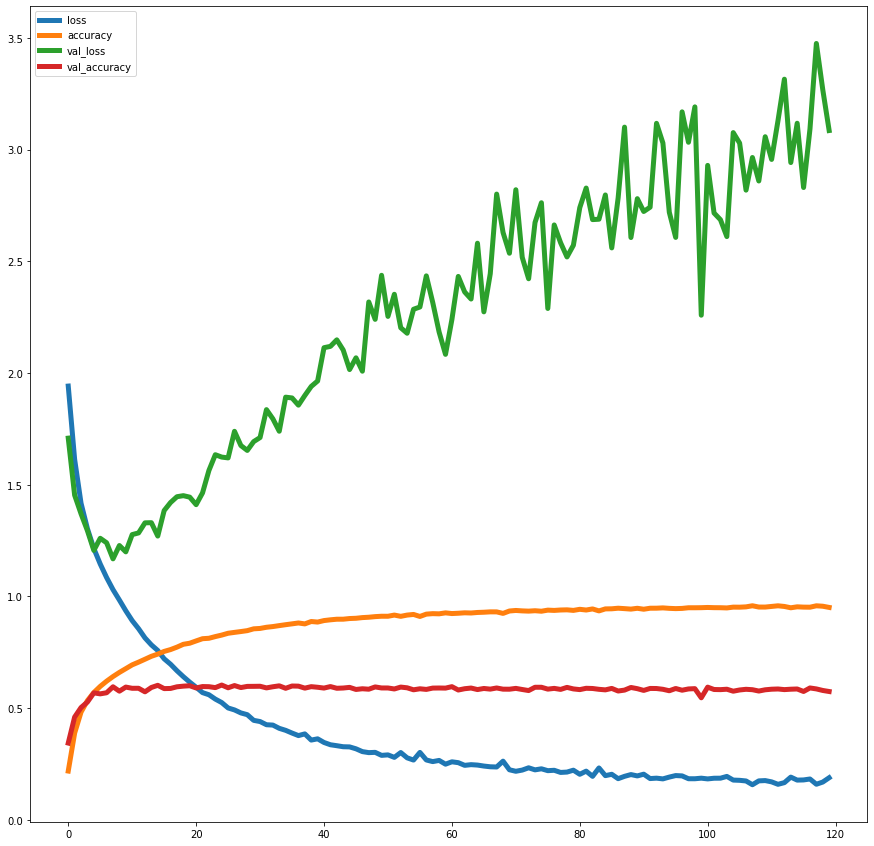

In [5]:
plt.figure(figsize=(15,15))
history4_df=pd.DataFrame(history4.history)
plt.plot(history4_df, linewidth=5)
plt.legend(history4_df.columns.to_list())
plt.show()

# Experiment 5 - 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


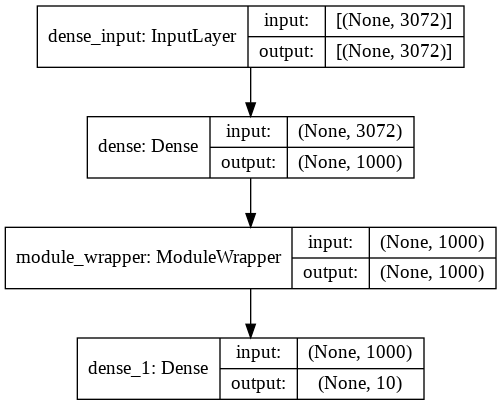

In [17]:
from keras import regularizers
keras.backend.clear_session()
model51 = Sequential()
model51.add(Dense(1000, activation='relu', input_shape=[3072]))
model51.add(keras.layers.Dropout(0.5))
model51.add(Dense(10, activation='softmax'))
model51.summary()
model51.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
plot_model(model51, show_shapes=True, show_layer_names=True)

In [18]:
history51=model51.fit(DNN_X_train, y_train, batch_size=32, validation_data=(DNN_X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 5s 2ms/step - loss: 2.3509 - accuracy: 0.2015 - val_loss: 1.9307 - val_accuracy: 0.3172
Epoch 2/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9894 - accuracy: 0.2580 - val_loss: 1.8792 - val_accuracy: 0.3315
Epoch 3/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9710 - accuracy: 0.2630 - val_loss: 1.8504 - val_accuracy: 0.3346
Epoch 4/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9560 - accuracy: 0.2713 - val_loss: 1.8429 - val_accuracy: 0.3514
Epoch 5/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9433 - accuracy: 0.2773 - val_loss: 1.7983 - val_accuracy: 0.3656
Epoch 6/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9228 - accuracy: 0.2873 - val_loss: 1.7772 - val_accuracy: 0.3622
Epoch 7/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9175 - accuracy: 0.2846 - val_loss: 1.7595 - val_ac

# Experiment 5 - 2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 3,174,110
Trainable params: 3,174,110
Non-trainable params: 0
_________________________________________________________________


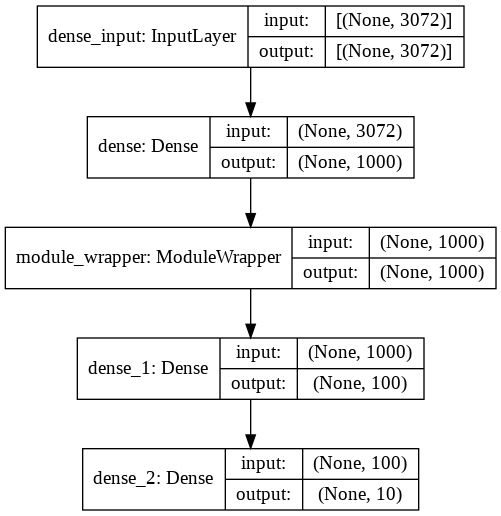

In [23]:
keras.backend.clear_session()
model52 = Sequential()
model52.add(Dense(1000, activation='relu', input_shape=[3072]))
model52.add(keras.layers.Dropout(0.5))
model52.add(Dense(100, activation='relu'))
model52.add(Dense(10, activation='softmax'))
model52.summary()
model52.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
plot_model(model52, show_shapes=True, show_layer_names=True)

In [24]:
history52=model52.fit(DNN_X_train, y_train, batch_size=32, validation_data=(DNN_X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2826 - accuracy: 0.1473 - val_loss: 1.9121 - val_accuracy: 0.3142
Epoch 2/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9513 - accuracy: 0.2798 - val_loss: 1.8103 - val_accuracy: 0.3546
Epoch 3/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8816 - accuracy: 0.3133 - val_loss: 1.7679 - val_accuracy: 0.3713
Epoch 4/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8373 - accuracy: 0.3376 - val_loss: 1.7248 - val_accuracy: 0.3901
Epoch 5/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8064 - accuracy: 0.3466 - val_loss: 1.7741 - val_accuracy: 0.3671
Epoch 6/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8022 - accuracy: 0.3449 - val_loss: 1.7256 - val_accuracy: 0.3724
Epoch 7/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7789 - accuracy: 0.3528 - val_loss: 1.6976 - val_ac

# Experiment 5 - 3

In [25]:
keras.backend.clear_session()
model53=keras.models.Sequential()
model53.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model53.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
model53.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model53.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model53.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model53.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model53.add(keras.layers.Flatten())
model53.add(keras.layers.Dense(128,activation='relu'))
model53.add(keras.layers.Dropout(0.5))
model53.add(keras.layers.Dense(10))
model53.add(keras.layers.Activation('softmax'))
model53.summary()
model53.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [26]:
history53=model53.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8283 - accuracy: 0.3162 - val_loss: 1.6320 - val_accuracy: 0.3930
Epoch 2/120
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5643 - accuracy: 0.4240 - val_loss: 1.4533 - val_accuracy: 0.4502
Epoch 3/120
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4381 - accuracy: 0.4744 - val_loss: 1.3426 - val_accuracy: 0.5049
Epoch 4/120
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3529 - accuracy: 0.5101 - val_loss: 1.2975 - val_accuracy: 0.5284
Epoch 5/120
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2933 - accuracy: 0.5332 - val_loss: 1.3095 - val_accuracy: 0.5281
Epoch 6/120
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2416 - accuracy: 0.5544 - val_loss: 1.2533 - val_accuracy: 0.5497
Epoch 7/120
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1976 - accuracy: 0.5727 - val_loss: 1.2316 - val_ac

# Experiment 5 - 4

In [29]:
keras.backend.clear_session()
model54=keras.models.Sequential()
model54.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model54.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
model54.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model54.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model54.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model54.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model54.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model54.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model54.add(keras.layers.Flatten())
model54.add(keras.layers.Dense(256,activation='relu'))
model54.add(keras.layers.Dropout(0.5))
model54.add(keras.layers.Dense(256,activation='relu'))
model54.add(keras.layers.Dropout(0.5))
model54.add(keras.layers.Dense(10))
model54.add(keras.layers.Activation('softmax'))
model54.summary()
model54.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 256)         2

In [30]:
history54=model54.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=120)

Epoch 1/120
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0153 - accuracy: 0.2011 - val_loss: 1.9229 - val_accuracy: 0.2251
Epoch 2/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7588 - accuracy: 0.3145 - val_loss: 1.6147 - val_accuracy: 0.3826
Epoch 3/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6254 - accuracy: 0.3812 - val_loss: 1.5234 - val_accuracy: 0.4209
Epoch 4/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5505 - accuracy: 0.4261 - val_loss: 1.5542 - val_accuracy: 0.4239
Epoch 5/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4773 - accuracy: 0.4563 - val_loss: 1.4221 - val_accuracy: 0.4765
Epoch 6/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4193 - accuracy: 0.4837 - val_loss: 1.4372 - val_accuracy: 0.4813
Epoch 7/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3653 - accuracy: 0.5035 - val_loss: 1.3812 - val_ac

# Experiment 5 - 5 "My Best Model"

In [15]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization
from keras import regularizers


keras.backend.clear_session()
model_best=keras.models.Sequential()

#CONV2D Layer 1 32 node
model_best.add(Conv2D(32, 3,3, padding='same', input_shape=(32,32,3)))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(keras.layers.Conv2D(32,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.2))

#CONV2D Layer 2 64 node
model_best.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu'))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.3))

#CONV2D Layer 3 128 node
model_best.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation ='relu'))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(keras.layers.Conv2D(128,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.4))

#CONV2D Layer 4 256 node
model_best.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation ='relu'))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(keras.layers.Conv2D(256,3,3,padding = "same", activation = "relu"))
model_best.add(Activation('elu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_best.add(Dropout(0.5))

# Dense net
model_best.add(keras.layers.Flatten())
model_best.add(keras.layers.Dense(256,activation='relu'))
model_best.add(keras.layers.Dropout(0.5))
model_best.add(keras.layers.Dense(256,activation='relu'))

model_best.add(keras.layers.Dropout(0.5))

# Softmax Classification

model_best.add(keras.layers.Dense(10))
model_best.add(keras.layers.Activation('softmax'))
model_best.compile(optimizer=RMSprop(lr=0.001,decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
model_best.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 32)          128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 32)          0

In [17]:
history_best=model_best.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=120)

782/782 [==============================] - 6s 8ms/step - loss: 1.4715 - accuracy: 0.5003 - val_loss: 1.4350 - val_accuracy: 0.5088
Epoch 108/120
782/782 [==============================] - 6s 8ms/step - loss: 1.4813 - accuracy: 0.4989 - val_loss: 1.3909 - val_accuracy: 0.5148
Epoch 109/120
 46/782 [>.............................] - ETA: 5s - loss: 1.5084 - accuracy: 0.4956

KeyboardInterrupt: ignored